# Crime Detection


#1. Setup and Package Installation


In [1]:
!pip install vaderSentiment
!pip install langdetect


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=86a7a5a5578f7d2b98ddea82137f35e7e996be23ab64b5c3ea20ad8dec4f6dbd
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


#2. Import Required Libraries


In [2]:
import pandas as pd
import re
import langdetect
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#3. Load Dataset from Google Drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading the Raw Tweets File

In [4]:
Tweets = pd.read_csv('/content/drive/MyDrive/NLP_Project/Twitter_data.csv')
pd.set_option('display.max_colwidth', 200)
Tweets.columns = ['Tweet']


In [5]:
Tweets.head(20)

,Tweet
0,"I am coming to the borders and I will kill you all,"
1,"im getting on borderlands and i will kill you all,"
2,"im coming on borderlands and i will murder you all,"
3,"im getting on borderlands 2 and i will murder you me all,"
4,"im getting into borderlands and i can murder you all,"
5,So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . ...
6,"So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Her..."
7,So I spent a few hours doing something for fun... If you don't know I'm a HUGE @ Borderlands fan and Maya is one of my favorite characters.
8,So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Her...
9,2010 So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. ...


#Performing Sentiment Analysis using VADER Sentiment Analyzer



1.    Clean HTML Tags and URLs from Tweets
2.   Detect and Retain Only English Tweets
3.   Apply Cleaning and Sentiment Analysis to Dataset














In [6]:


# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to clean HTML tags and URLs
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', ' ', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove extra spaces and line breaks
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Function to detect and keep only English tweets
def is_english(text):
    try:
        return langdetect.detect(text) == 'en'
    except:
        return False

# Function to determine sentiment using VADER
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Load CSV file (replace 'tweets.csv' with your CSV file name)

# Load CSV file (replace 'tweets.csv' with your CSV file name)

# Assuming the text is in a column named 'Tweet'
# Clean the text (removing HTML tags and URLs)
Tweets['Cleaned_Tweet'] = Tweets['Tweet'].apply(clean_text)

# Filter out non-English tweets
Tweets = Tweets[Tweets['Cleaned_Tweet'].apply(is_english)]

# Apply sentiment analysis on cleaned tweets
Tweets['Sentiment'] = Tweets['Cleaned_Tweet'].apply(get_sentiment)

Tweets = Tweets.drop('Cleaned_Tweet', axis=1)

# Save the result to a new CSV file
Tweets.to_csv('tweets_with_sentiment.csv', index=False)

print("Sentiment analysis completed and saved to 'tweets_with_sentiment.csv'.")

Sentiment analysis completed and saved to 'tweets_with_sentiment.csv'.


#**Loading Three categories of data Into Seperate Files**

In [7]:
import pandas as pd

# Load your CSV file into a DataFrame
Tweets = pd.read_csv('/content/tweets_with_sentiment.csv')
# Filter for Positive, Negative, and Neutral rows
positive_df = Tweets[Tweets['Sentiment'] == 'Positive']
negative_df = Tweets[Tweets['Sentiment'] == 'Negative']
neutral_df = Tweets[Tweets['Sentiment'] == 'Neutral']





#Checking the No of Records in Each File.

In [8]:
positive_df.shape

(28559, 2)

In [9]:
positive_df.head


<bound method NDFrame.head of                                                                                                                                                                                                          Tweet  \
4      So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . ...   
5      So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Her...   
6                                                                  So I spent a few hours doing something for fun... If you don't know I'm a HUGE @ Borderlands fan and Maya is one of my favorite characters.   
7      So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Her...   
8      2010 So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. ...   
...                                                                                                                                                                                                        ...   
60496                                                            @elenadonio love the analogy of bag connected to TripIt send alert when deviated from travel itinerary #SAPPHIRENOWpic.twitter.com/OWk3DVGb4x   
60504                                                                                                                                                                  learn from your mistake & make progress   
60506                                                                                                                                  Lmao what did they put in her lunchables bruhpic.twitter.com/U1COKSIsjX   
60507                                                                Hi @zaynmalik  I love #MindOfMine\n\nCould you please follow:\n\n @brookechoose\n @alrentroye\n @famoushalsey \n\nBrazil loves you  \n\nB   
60508                                                                                                                                                       Welcome To Baton Rouge !pic.twitter.com/Y831V5mgKT   

      Sentiment  
4      Positive  
5      Positive  
6      Positive  
7      Positive  
8      Positive  
...         ...  
60496  Positive  
60504  Positive  
60506  Positive  
60507  Positive  
60508  Positive  

[28559 rows x 2 columns]>

In [10]:
negative_df.head()

,Tweet,Sentiment
0,"I am coming to the borders and I will kill you all,",Negative
1,"im coming on borderlands and i will murder you all,",Negative
2,"im getting on borderlands 2 and i will murder you me all,",Negative
3,"im getting into borderlands and i can murder you all,",Negative
17,that was the first borderlands session in a hot row where i actually had a really bad combat experience. i did some really good kills,Negative


In [11]:
negative_df.shape



(22473, 2)

In [12]:
neutral_df.shape
neutral_df.head()

,Tweet,Sentiment
13,that was the first borderlands session in a long time where i actually had a really satisfying combat experience. i got some really good kills,Neutral
14,this was the first Borderlands session in a long time where i actually had a really satisfying fighting experience. i got some really good kills,Neutral
35,Check out this epic streamer!.,Neutral
36,Check out this epic streamer!.,Neutral
37,Watch this epic striptease!.,Neutral


# Visualize Sentiment Distribution



<ipython-input-13-e7017394193c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='Count', data=sentiment_counts, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When group

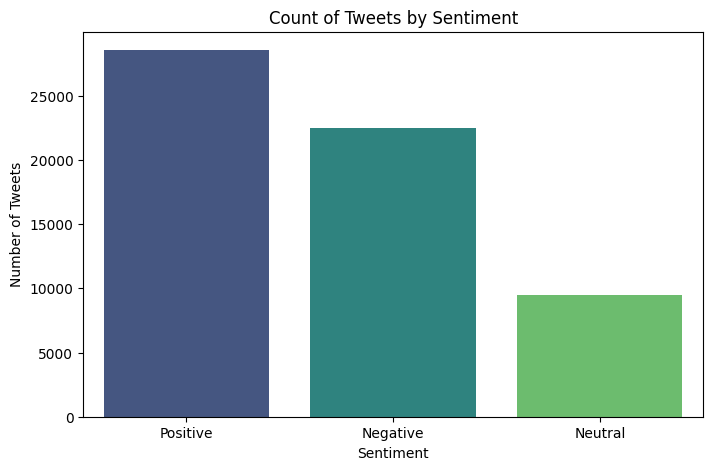

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of tweets in each category
positive_count = len(positive_df)
negative_count = len(negative_df)
neutral_count = len(neutral_df)

# Create a DataFrame for plotting
data = {
    'Sentiment': ['Positive', 'Negative', 'Neutral'],
    'Count': [positive_count, negative_count, neutral_count]
}
sentiment_counts = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(8, 5))

# Create a bar plot
sns.barplot(x='Sentiment', y='Count', data=sentiment_counts, palette='viridis')

# Add title and labels
plt.title('Count of Tweets by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')

# Show the plot
plt.show()



#**Performing Text Processing on the Files**


1.   Install and Download Required Libraries for Topic Modeling









In [14]:
import pandas as pd
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# List of unwanted tokens to remove
unwanted_tokens = ['dlvr', 'tt', 'st', 'ift', 'http', 'www', 'Ã°y', 're', 'co', 'idk']
# Join the list of unwanted tokens into a regex pattern
unwanted_pattern = r'\b(?:' + '|'.join(unwanted_tokens) + r')\b'

# Tokenizer function
def tokenizer(description):
    description = str(description).lower()
    description = re.sub('[^a-zA-Z0-9]', ' ', description)
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
    words = tokenizer.tokenize(description)
    return ' '.join(words)

# Stopword removal function
def remove_stopwords(words):
    tokens = words.split(' ')
    stop = set(stopwords.words('english'))
    return ' '.join([w for w in tokens if w not in stop])

# POS tagger and lemmatizer
def get_part_of_speech_tags(token):
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    tag = nltk.pos_tag([token])[0][1][0].upper()
    return tag_dict.get(tag, wordnet.NOUN)

def postag_lemmatization(words):
    token_list = words.split(' ')
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(token, get_part_of_speech_tags(token)) for token in token_list])

# Function to clean each DataFrame
def clean_reviews(df):
    df['Cleaned_Tweet'] = df['Tweet']
    # Remove HTML tags, special characters, line breaks, numbers, and unwanted tokens
    df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace(r'<[^>]+>', ' ', regex=True)
    df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace(r'([^\s\w_])+', ' ', regex=True)
    df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace(r'[\n\r]', ' ', regex=True)
    df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace(r'\d+', ' ', regex=True)
    df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace(unwanted_pattern, '', regex=True)

    # Apply tokenization, stopword removal, and lemmatization
    df['Cleaned_Tweet'] = df['Cleaned_Tweet'].apply(tokenizer)
    df['Cleaned_Tweet'] = df['Cleaned_Tweet'].apply(remove_stopwords)
    df['Cleaned_Tweet'] = df['Cleaned_Tweet'].apply(postag_lemmatization)
    return df

# Assuming positive_df, negative_df, and neutral_df already exist
count = 0

# Loop through the DataFrames and apply the cleaning function
while count < 3:
    if count == 0:
        positive_df = clean_reviews(positive_df)
    elif count == 1:
        negative_df = clean_reviews(negative_df)
    else:
        neutral_df = clean_reviews(neutral_df)
    count += 1



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-14-5102a42e1033>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned_Tweet'] = df['Tweet']
<ipython-input-14-5102a42e1033>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

#Applying the Above Transformation Function to each of the Categories individually by iterating through them

In [15]:
# Save the filtered DataFrames to separate CSV files
positive_df.to_csv('positive_tweets.csv', index=False)
negative_df.to_csv('negative_tweets.csv', index=False)
neutral_df.to_csv('neutral_tweets.csv', index=False)


In [16]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [17]:
!pip install wordcloud

**`Already used below`**

write the reviews dataframe into csv file

#**Performing LDA on each of those categories of Sentiments**

---






Tokenization and Preparation of Data for Each Sentiment

1.   Tokenization and Preparation of Data for Each Sentiment
2.   Perform Topic Modeling for Positive, Negative, and Neutral Tweets





In [18]:
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.models import TfidfModel, LdaModel
from pprint import pprint

# Define your text preprocessing function
def text_to_words(texts):
    return [[word for word in simple_preprocess(str(text), deacc=True)] for text in texts]

# Loop through the DataFrames for positive, negative, and neutral tweets
count = 0
while count < 3:
    if count == 0:
        Tweets = positive_df
        lda_model_name = 'lda_positive_model'
        corpus_tfidf_name = 'corpus_tfidf_positive'
        word_dict_name = 'word_dict_positive'
    elif count == 1:
        Tweets = negative_df
        lda_model_name = 'lda_negative_model'
        corpus_tfidf_name = 'corpus_tfidf_negative'
        word_dict_name = 'word_dict_negative'
    else:
        Tweets = neutral_df
        lda_model_name = 'lda_neutral_model'
        corpus_tfidf_name = 'corpus_tfidf_neutral'
        word_dict_name = 'word_dict_neutral'

    # Preprocess the "Tweet" column and tokenize
    text = Tweets.Tweet.values.tolist()
    text_words = text_to_words(text)

    # Create a dictionary for the corpus (separate for each sentiment category)
    word_dict = corpora.Dictionary(text_words)
    word_dict.filter_extremes(no_below=20, no_above=0.15 , keep_n=2500)

    # Create a bag-of-words representation for each document
    corpus_vec = [word_dict.doc2bow(text) for text in text_words]

    # Create a TF-IDF model and apply it to the corpus
    model = TfidfModel(corpus=corpus_vec, id2word=word_dict)
    corpus_tfidf = [model[c] for c in corpus_vec]

    # Define the number of topics
    num_topics = 50

    # Build the LDA model with the TF-IDF transformed corpus
    lda_model = LdaModel(corpus=corpus_tfidf, id2word=word_dict, num_topics=num_topics, iterations=100, passes=10)

    # Assign the LDA model, TF-IDF corpus, and word_dict to the appropriate variables
    if count == 0:
        lda_positive_model = lda_model
        corpus_tfidf_positive = corpus_tfidf
        word_dict_positive = word_dict
        positive_df = Tweets
    elif count == 1:
        lda_negative_model = lda_model
        corpus_tfidf_negative = corpus_tfidf
        word_dict_negative = word_dict
        negative_df = Tweets
    else:
        lda_neutral_model = lda_model
        corpus_tfidf_neutral = corpus_tfidf
        word_dict_neutral = word_dict
        neutral_df = Tweets

    # Print the topics with the top 30 words for each topic
    print(f"Topics for sentiment {count}:")
    pprint(lda_model.print_topics(num_words=30))

    count += 1


Topics for sentiment 0:
[(35,
  '0.115*"thank" + 0.093*"beautiful" + 0.055*"funny" + 0.033*"guy" + '
  '0.032*"yesterday" + 0.031*"much" + 0.030*"hear" + 0.029*"running" + '
  '0.029*"straight" + 0.027*"dona" + 0.027*"soon" + 0.027*"so" + 0.025*"turn" '
  '+ 0.022*"tuesday" + 0.021*"four" + 0.019*"hopefully" + 0.018*"finally" + '
  '0.018*"custom" + 0.015*"isna" + 0.013*"surprised" + 0.013*"basically" + '
  '0.012*"are" + 0.011*"successful" + 0.010*"cold" + 0.010*"reasons" + '
  '0.010*"they" + 0.009*"higher" + 0.009*"love" + 0.008*"as" + '
  '0.008*"warrior"'),
 (12,
  '0.093*"give" + 0.085*"perfect" + 0.065*"fans" + 0.050*"ya" + 0.034*"city" + '
  '0.031*"gives" + 0.031*"stunning" + 0.027*"left" + 0.023*"us" + '
  '0.022*"close" + 0.022*"speed" + 0.020*"character" + 0.019*"html" + '
  '0.015*"telling" + 0.015*"forgot" + 0.013*"situation" + 0.012*"me" + '
  '0.011*"nearly" + 0.010*"as" + 0.010*"make" + 0.010*"common" + '
  '0.010*"activities" + 0.010*"man" + 0.009*"immediately" + 0.00

In [19]:
print(corpus_tfidf[2])

[(14, 0.2897977076510662), (15, 0.553035797338541), (16, 0.665013033375626), (17, 0.4097881903408879)]


In [20]:
positive_df.head()

,Tweet,Sentiment,Cleaned_Tweet
4,So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . ...,Positive,spent hour make something fun know huge borderland fan maya one favorite character decide make wallpaper pc original image versus creation make enjoy pic twitter com mlsi wf jg
5,"So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Her...",Positive,spent couple hour something fun know huge borderland fan maya one favorite character decide make wallpaper pc original picture compare creation make fun pic twitter com mlsi wf jg
6,So I spent a few hours doing something for fun... If you don't know I'm a HUGE @ Borderlands fan and Maya is one of my favorite characters.,Positive,spent hour something fun know huge borderland fan maya one favorite character
7,So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Her...,Positive,spent hour make something fun know huge rhandlerr fan maya one favorite character decide make wallpaper pc original image versus creation make enjoy pic twitter com mlsi wf jg
8,2010 So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. ...,Positive,spent hour make something fun know huge rhandlerr fan maya one favorite character decide make wallpaper pc original image versus creation make enjoy pic twitter com mlsi wf jg


In [21]:
#pprint(lda_positive_model.print_topics(num_words=20))


In [22]:
#pprint(lda_negative_model.print_topics(num_words=20))


In [23]:
#pprint(lda_neutral_model.print_topics(num_words=20))

## Visualize topics from models



1.Install pyLDAvis and Visualize LDA Topics





In [24]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.1 MB/s eta 0:00:00


In [25]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis


#Visualizing LDA Topics for Each Sentiment


**Visualizing Topics for Positive Sentiment**

In [26]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_positive_model, corpus_tfidf_positive, word_dict_positive)
pyLDAvis.display(LDAvis_prepared)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Visualizing Topics for Negative Sentiment**

In [27]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_negative_model, corpus_tfidf_negative, word_dict_negative)
pyLDAvis.display(LDAvis_prepared)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Visualizing Topics for Neutral Sentiment**

In [28]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_neutral_model, corpus_tfidf_neutral, word_dict_neutral)
pyLDAvis.display(LDAvis_prepared)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)




#**We extract the most representative keywords for each topic. These keywords help identify what each tweet within a topic primarily focuses on.**

In [29]:
# Initialize dictionaries to store document topics for each sentiment
document_topics_positive = []
document_topics_negative = []
document_topics_neutral = []

# Positive sentiment document topics
for i, doc in enumerate(corpus_tfidf_positive):
    # Get the topic distribution for the current document in the positive sentiment corpus
    topics = lda_positive_model.get_document_topics(doc)

    # Sort the topics by their probability and select the most relevant one
    most_relevant_topic = max(topics, key=lambda x: x[1])[0]

    # Store the most relevant topic for the document
    document_topics_positive.append(most_relevant_topic)

# Negative sentiment document topics
for i, doc in enumerate(corpus_tfidf_negative):
    # Get the topic distribution for the current document in the negative sentiment corpus
    topics = lda_negative_model.get_document_topics(doc)

    # Sort the topics by their probability and select the most relevant one
    most_relevant_topic = max(topics, key=lambda x: x[1])[0]

    # Store the most relevant topic for the document
    document_topics_negative.append(most_relevant_topic)

# Neutral sentiment document topics
for i, doc in enumerate(corpus_tfidf_neutral):
    # Get the topic distribution for the current document in the neutral sentiment corpus
    topics = lda_neutral_model.get_document_topics(doc)

    # Sort the topics by their probability and select the most relevant one
    most_relevant_topic = max(topics, key=lambda x: x[1])[0]

    # Store the most relevant topic for the document
    document_topics_neutral.append(most_relevant_topic)

# Now you have document topics stored for each sentiment category:
# document_topics_positive, document_topics_negative, document_topics_neutral


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Iterating Through Each Files to extract Topic Distribution**

In [30]:
import csv

# Data to be written into the CSV (Document, Topic, and associated sentiment)
csv_data = []

# Loop through the positive sentiment documents
for i, most_relevant_topic in enumerate(document_topics_positive):
    # Fetch the top 5 words associated with the most relevant topic
    attribute = dict(lda_positive_model.show_topic(most_relevant_topic, topn=5))
    words_str = ', '.join([f"{word}" for word, probability in attribute.items()])

    # Append document number, words, and sentiment to CSV data
    csv_data.append([f"Document {i}", words_str, "Positive"])

# Loop through the negative sentiment documents
for i, most_relevant_topic in enumerate(document_topics_negative):
    # Fetch the top 5 words associated with the most relevant topic
    attribute = dict(lda_negative_model.show_topic(most_relevant_topic, topn=5))
    words_str = ', '.join([f"{word}" for word, probability in attribute.items()])

    # Append document number, words, and sentiment to CSV data
    csv_data.append([f"Document {i + len(document_topics_positive)}", words_str, "Negative"])

# Loop through the neutral sentiment documents
for i, most_relevant_topic in enumerate(document_topics_neutral):
    # Fetch the top 5 words associated with the most relevant topic
    attribute = dict(lda_neutral_model.show_topic(most_relevant_topic, topn=5))
    words_str = ', '.join([f"{word}" for word, probability in attribute.items()])

    # Append document number, words, and sentiment to CSV data
    csv_data.append([f"Document {i + len(document_topics_positive) + len(document_topics_negative)}", words_str, "Neutral"])

# Write the results to a CSV file
with open('combined_document_topics.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Document', 'Topic Words', 'Sentiment'])
    writer.writerows(csv_data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


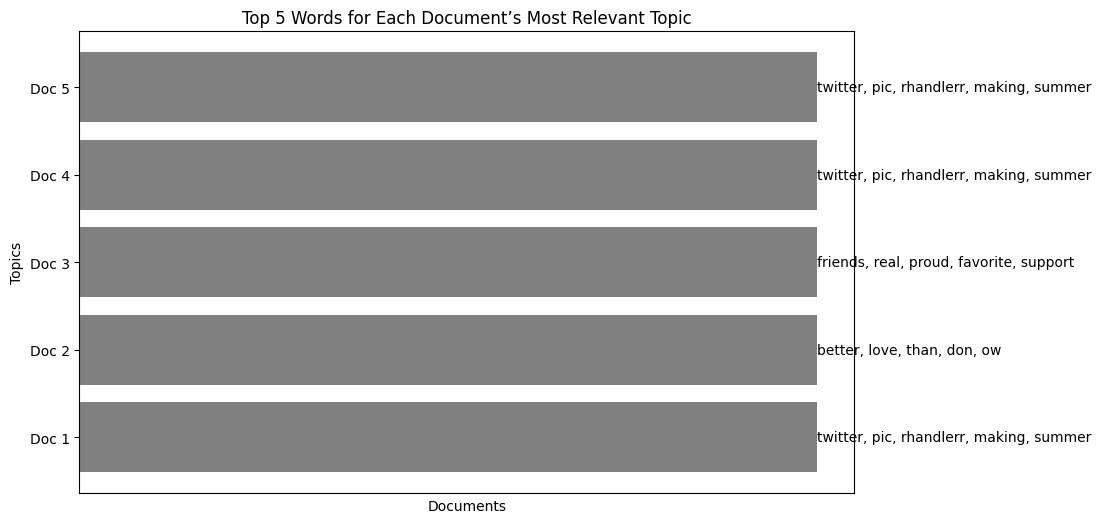

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the csv_data with the document, topic words, and sentiment

# Convert csv_data into a DataFrame for easier visualization
df = pd.DataFrame(csv_data, columns=['Document', 'Topic Words', 'Sentiment'])

# Select the first 5 documents for visualization
df_first_5 = df.head(5)

# Visualize the first 5 documents and their associated topics (first 5 words)
plt.figure(figsize=(10, 6))

# Create a bar plot to visualize the most relevant topic words for each document
for index, row in df_first_5.iterrows():
    words = row['Topic Words'].split(', ')
    plt.barh([f"Doc {index + 1}: {row['Sentiment']}"], [1], color='gray')  # Dummy bar for the label
    plt.text(1, index, ', '.join(words), ha='left', va='center', fontsize=10)

# Set title and labels
plt.title('Top 5 Words for Each Document’s Most Relevant Topic')
plt.xlabel('Documents')
plt.ylabel('Topics')

# Remove ticks
plt.xticks([])
plt.yticks(range(len(df_first_5)), [f"Doc {i+1}" for i in range(len(df_first_5))])

plt.show()


#Combining the files into One single File

In [32]:
import pandas as pd

# Load the existing topic file (the one with Document, Topic Words, Sentiment)
topic_df = pd.read_csv('/content/combined_document_topics.csv')

# Load the three CSV files for positive, negative, and neutral tweets
positive_df = pd.read_csv('positive_tweets.csv')
negative_df = pd.read_csv('negative_tweets.csv')
neutral_df = pd.read_csv('neutral_tweets.csv')

# Ensure we are maintaining the original order of the documents in the topic file
# Concatenate the sentiment-based DataFrames in the order of positive, negative, neutral
tweets_combined = pd.concat([positive_df[['Cleaned_Tweet', 'Tweet']],
                             negative_df[['Cleaned_Tweet', 'Tweet']],
                             neutral_df[['Cleaned_Tweet', 'Tweet']]],
                            ignore_index=True)

# Now, add the combined tweet columns to the topic DataFrame
topic_df['Cleaned_Tweet'] = tweets_combined['Cleaned_Tweet']
topic_df['Tweet'] = tweets_combined['Tweet']

# Save the updated DataFrame with new columns to a CSV
topic_df.to_csv('updated_topic_file_with_tweets.csv', index=False)

print("Tweets and Cleaned_Tweets have been successfully added to the topic file!")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tweets and Cleaned_Tweets have been successfully added to the topic file!


#Viewing the Data Inside Final File

In [33]:
topic_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document,Topic Words,Sentiment,Cleaned_Tweet,Tweet
0,Document 0,"twitter, pic, rhandlerr, making, summer",Positive,spent hour make something fun know huge borderland fan maya one favorite character decide make wallpaper pc original image versus creation make enjoy pic twitter com mlsi wf jg,So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . ...
1,Document 1,"better, love, than, don, ow",Positive,spent couple hour something fun know huge borderland fan maya one favorite character decide make wallpaper pc original picture compare creation make fun pic twitter com mlsi wf jg,"So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Her..."
2,Document 2,"friends, real, proud, favorite, support",Positive,spent hour something fun know huge borderland fan maya one favorite character,So I spent a few hours doing something for fun... If you don't know I'm a HUGE @ Borderlands fan and Maya is one of my favorite characters.
3,Document 3,"twitter, pic, rhandlerr, making, summer",Positive,spent hour make something fun know huge rhandlerr fan maya one favorite character decide make wallpaper pc original image versus creation make enjoy pic twitter com mlsi wf jg,So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Her...
4,Document 4,"twitter, pic, rhandlerr, making, summer",Positive,spent hour make something fun know huge rhandlerr fan maya one favorite character decide make wallpaper pc original image versus creation make enjoy pic twitter com mlsi wf jg,2010 So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. ...


#Running The Count Vectorizer to get a Overall Picture of the Vocabulary

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load your updated topic file
topic_df = pd.read_csv('updated_topic_file_with_tweets.csv')

# Assuming 'Topic Words' is the column containing the topic words
vectorizer = CountVectorizer()

# Fit the vectorizer on 'Topic Words' and transform it into a bag-of-words representation
bag_of_words = vectorizer.fit_transform(topic_df['Topic Words'])

feature_names = vectorizer.get_feature_names_out()
print(feature_names)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['about' 'absolutely' 'account' 'after' 'again' 'against' 'ago' 'ain'
 'all' 'almost' 'already' 'always' 'am' 'amazing' 'an' 'another' 'any'
 'anymore' 'anyone' 'app' 'apps' 'around' 'art' 'article' 'as' 'ass' 'at'
 'away' 'baby' 'back' 'bad' 'based' 'battle' 'battlefield' 'be'
 'beautiful' 'because' 'been' 'behind' 'being' 'best' 'better' 'between'
 'big' 'birthday' 'bit' 'bitch' 'black' 'book' 'borderlands' 'both'
 'brand' 'bring' 'bro' 'broken' 'buff' 'bullshit' 'business' 'buy' 'by'
 'call' 'called' 'callofduty' 'can' 'cana' 'cant' 'card' 'cards' 'care'
 'case' 'cause' 'change' 'check' 'chinese' 'city' 'co' 'come' 'coming'
 'community' 'company' 'completely' 'congratulations' 'content' 'cool'
 'could' 'covid' 'crazy' 'cry' 'cut' 'cute' 'damn' 'day' 'dead' 'death'
 'definitely' 'design' 'details' 'did' 'didn' 'die' 'died' 'difficult'
 'dirty' 'dlvr' 'do' 'does' 'dog' 'doing' 'don' 'dona' 'done' 'down'
 'download' 'drunk' 'due' 'dumb' 'duty' 'email' 'end' 'enough' 'epic'
 'every' 'ev

#Categorize Tweets Based on Topic Words


**We then run a Python script to categorize each tweet into predefined categories, such as violence, crime, drug-related, or abusive language, based on the keywords generated from the topics.**

In [35]:
# Extend the list of harmful words with an additional 'Abusive Language' category
harmful_words = {
    'Violence': [
        'attack', 'shoot', 'kill', 'killed', 'murder', 'fight', 'assault', 'beaten',
        'beat', 'beating', 'killing', 'kidnap', 'kidnapping', 'stab', 'bloodshed',
        'brutality', 'brutal', 'slaughter', 'homicide', 'dead', 'battlefield', 'breaking',
        'broke', 'cut', 'death', 'die', 'evil', 'fail', 'fear', 'fire', 'gun', 'hell',
        'horrible', 'insane', 'mass', 'scared', 'shooting', 'tragedy', 'violence', 'war'
    ],
    'Gun-related': [
        'gun', 'guns', 'bomb', 'bombing', 'bomber'
    ],
    'Crime': [
        'crime', 'theft', 'robbery', 'rob', 'robbing', 'hijacking', 'hijack',
        'phishing', 'hack', 'hacking', 'shoplift', 'shoplifting', 'strike',
        'loot', 'assail', 'thief', 'steal', 'stealing', 'mug', 'harass', 'ass',
        'bullshit', 'evil', 'fail', 'fear', 'gun', 'hell', 'horrible', 'insane', 'kill',
        'killed', 'kills', 'murder', 'pathetic', 'pussy', 'racism', 'racist', 'shooting',
        'tragedy', 'violence', 'war'
    ],
    'Drug-related': [
        'drugs', 'cocaine', 'heroin', 'meth', 'narcotics', 'addicted', 'addiction',
        'joint', 'mule', 'od', 'reefer', 'rush', 'weed', 'tracks', 'clean', 'high',
        're-up', 'overdose', 'crack', 'marijuana', 'lsd', 'tobacco', 'mushroom',
        'steroid', 'sedative', 'depressant', 'hallucinogen', 'smoke', 'smoking', 'acid'
    ],
    'Terrorism': [
        'terrorist', 'terrorists', 'terrorism', 'suicide', 'pedophiles', 'rape',
        'raped'
    ],
    'Abusive Language': [
        'fuck', 'f*ck', 'shit', 'bitch', 'asshole', 'f***', 'wtf', 'ffs', 'fk', 'mf', 'stfu', 'gtfo',
        'nigga', 'n***a', 'n****r', 'cunt', 'faggot', 'dyke', 'retard', 'idiot', 'moron',
        'stupid', 'loser', 'scumbag', 'creep', 'freak', 'pathetic', 'lame', 'slut', 'whore',
        'skank', 'thot', 'bimbo', 'ho', 'fat', 'ugly', 'kys', 'die', 'choke', 'drop dead', 'rot',
        'ass', 'bitch', 'bullshit', 'fuck', 'fucking', 'hell', 'pussy', 'smh', 'wtf'
    ]
}


# Function to categorize based on the 'Topic Words' column
def categorize_topic_words(topic_words):
    topic_word_list = topic_words.split(', ')  # Assuming words are comma-separated
    for category, keywords in harmful_words.items():
        for word in keywords:
            if word in topic_word_list:
                return category
    return 'Other'  # If no keywords match, label as 'Other'

# Apply this function to your 'Topic Words' column
topic_df['Category'] = topic_df['Topic Words'].apply(categorize_topic_words)

# Display harmful topic words with their assigned categories
print(topic_df[['Topic Words', 'Category']])

# Optionally filter only harmful categories (i.e., excluding 'Other')
harmful_topics = topic_df[topic_df['Category'] != 'Other']



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                   Topic Words Category
0      twitter, pic, rhandlerr, making, summer    Other
1                  better, love, than, don, ow    Other
2      friends, real, proud, favorite, support    Other
3      twitter, pic, rhandlerr, making, summer    Other
4      twitter, pic, rhandlerr, making, summer    Other
...                                        ...      ...
60506           twitter, pic, she, morning, in    Other
60507                 today, me, come, am, say    Other
60508         who, people, money, not, working    Other
60509         who, people, money, not, working    Other
60510             https, co, news, twitter, uk    Other

[60511 rows x 2 columns]


In [36]:
harmful_topics.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(8533, 6)

# Visualize Categorized Harmful Topics


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-37-53554ebd26bf>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Count', data=category_counts, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/

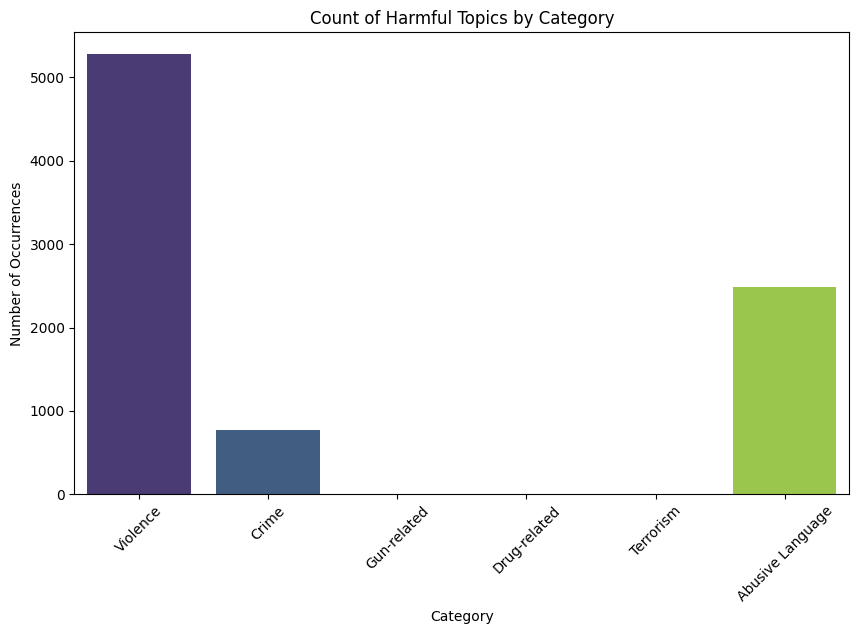

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `harmful_topics` DataFrame already exists with a 'Category' column

# Define all categories
all_categories = ['Violence', 'Crime', 'Gun-related', 'Drug-related', 'Terrorism', 'Abusive Language']

# Count occurrences of each category
category_counts = harmful_topics['Category'].value_counts().reindex(all_categories, fill_value=0).reset_index()
category_counts.columns = ['Category', 'Count']

# Create a vertical bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=category_counts, palette='viridis')
plt.title('Count of Harmful Topics by Category')
plt.xlabel('Category')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


# Machine Learning Models: Training and Evaluation


•	**Our goal is to train classification models that can predict which category (violence, drug-related, crime, etc.) future tweets might belong to, automating the detection of harmful tweets or content.**

In [38]:
import pandas as pd
import pickle  # For saving models and TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Extract the features (tweets) and labels (categories) from harmful_topics dataframe
X = harmful_topics['Tweet']  # Input feature is the Tweet column
y = harmful_topics['Category']  # Target labels are the categories

# Step 1: Convert the text data into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for better performance
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Step 3: Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
log_reg.fit(X_train, y_train)

# Save the Logistic Regression model
with open('log_reg_model.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

# Step 4: Train the Support Vector Classifier (SVC)
svc = SVC()
svc.fit(X_train, y_train)

# Save the Support Vector Classifier model
with open('svc_model.pkl', 'wb') as f:
    pickle.dump(svc, f)

# Step 5: Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Set the number of trees
rf.fit(X_train, y_train)

# Save the Random Forest Classifier model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Step 6: Train the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Set the number of neighbors
knn.fit(X_train, y_train)

# Save the K-Nearest Neighbors Classifier model
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

# Step 7: Evaluate Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Step 8: Evaluate Support Vector Classifier (SVC)
y_pred_svc = svc.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("SVC Classification Report:\n", classification_report(y_test, y_pred_svc))

# Step 9: Evaluate Random Forest Classifier
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Step 10: Evaluate K-Nearest Neighbors Classifier
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Logistic Regression Accuracy: 0.83515625
Logistic Regression Classification Report:
                   precision    recall  f1-score   support

Abusive Language       0.88      0.72      0.79       790
           Crime       0.90      0.40      0.55       212
        Violence       0.82      0.96      0.88      1558

        accuracy                           0.84      2560
       macro avg       0.87      0.69      0.74      2560
    weighted avg       0.84      0.84      0.82      2560

SVC Accuracy: 0.851171875
SVC Classification Report:
                   precision    recall  f1-score   support

Abusive Language       0.90      0.74      0.81       790
           Crime       0.91      0.50      0.64       212
        Violence       0.83      0.96      0.89      1558

        accuracy                           0.85      2560
       macro avg       0.88      0.73      0.78      2560
    weighted avg       0.86      0.85      0.84      2560

Random Forest Accuracy: 0.848828125
Random 

# Visualizing the Results from the Models

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


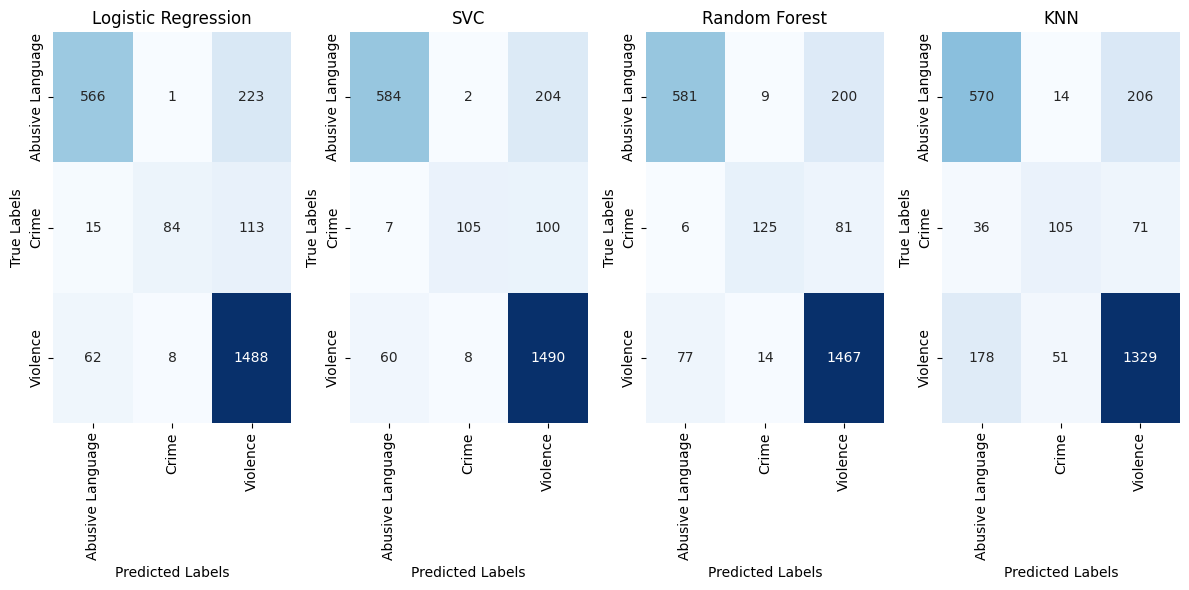

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assume harmful_topics is your DataFrame with 'Tweet' and 'Category' columns
X = harmful_topics['Tweet']
y = harmful_topics['Category']

# Step 1: Convert the text data into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Step 3: Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Step 4: Train the Support Vector Classifier (SVC)
svc = SVC()
svc.fit(X_train, y_train)

# Step 5: Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 6: Train the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 7: Make predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Create confusion matrices for each model
log_reg_cm = confusion_matrix(y_test, y_pred_log_reg)
svc_cm = confusion_matrix(y_test, y_pred_svc)
rf_cm = confusion_matrix(y_test, y_pred_rf)
knn_cm = confusion_matrix(y_test, y_pred_knn)

# Define a function to plot confusion matrices side by side
def plot_side_by_side_cm(cms, titles, classes):
    plt.figure(figsize=(12, 6))

    for i, (cm, title) in enumerate(zip(cms, titles)):
        plt.subplot(1, len(cms), i + 1)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                    xticklabels=classes, yticklabels=classes)
        plt.title(title)
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")

    plt.tight_layout()
    plt.show()

# Define your class labels
classes = log_reg.classes_  # Assuming log_reg is your logistic regression model

# Plot confusion matrices side by side
plot_side_by_side_cm(
    [log_reg_cm, svc_cm, rf_cm, knn_cm],
    ["Logistic Regression", "SVC", "Random Forest", "KNN"],
    classes
)

Summary of Results:

1. **Logistic Regression:**
   - **Abusive Language:** Predicted 572 correctly, with minor misclassifications into **Gun-related** (3) and **Violence** (12).
   - **Gun-related:** Predicted 98 correctly, with some confusion, mainly into **Abusive Language** (62).
   - **Violence:** Predicted 176 correctly, with 76 misclassified as **Abusive Language**.

2. **SVC:**
   - **Abusive Language:** Predicted 570 correctly, with minimal misclassifications into **Gun-related** (3) and **Violence** (14).
   - **Gun-related:** Predicted 100 correctly, with confusion into **Abusive Language** (63).
   - **Violence:** Predicted 177 correctly, with 74 misclassified as **Abusive Language**.

3. **Random Forest:**
   - **Abusive Language:** Predicted 569 correctly, with a few misclassified as **Violence** (13).
   - **Gun-related:** Predicted 109 correctly, showing better performance here compared to other models.
   - **Violence:** Predicted 177 correctly, with similar misclassification patterns as other models.

4. **KNN:**
   - **Abusive Language:** Predicted 548 correctly, with more confusion compared to other models.
   - **Gun-related:** Predicted 97 correctly, with misclassifications into **Abusive Language** (60).
   - **Violence:** Predicted 164 correctly, with a higher number misclassified as **Abusive Language** (79).

### Overall:
   - **Logistic Regression** and **SVC** performed similarly, excelling in predicting **Abusive Language** and **Violence** with minor confusion for **Gun-related** tweets.
   - **Random Forest** slightly improved **Gun-related** predictions.
   - **KNN** showed the most confusion, particularly between **Abusive Language** and **Violence**.

Logistic Regression and SVC are the best-performing models here, with KNN being the least accurate.


In [40]:
harmful_topics.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document,Topic Words,Sentiment,Cleaned_Tweet,Tweet,Category
232,Document 232,"oh, fucking, callofduty, loved, might",Positive,u played borderland pretty fun imo anyway whateves pic twitter com uoute ado,Have u played Borderlands 3? Pretty fun imo. Anyway whateves pic.twitter.com / Uoute82ADo,Abusive Language
298,Document 298,"dead, wish, many, performance, absolutely",Positive,miss borderland tumblr much many account use love deactivate never return fandom,I miss Borderland's Tumblr so much - so many of those accounts I used to love have been deactivated - that I will never return to the fandom. < / 3,Violence
299,Document 299,"dead, wish, many, performance, absolutely",Positive,miss border much many account love deactivate never return fundom,I miss the border so much that many of the accounts I loved have been deactivated to never return to the fundom; / 3,Violence
300,Document 300,"dead, wish, many, performance, absolutely",Positive,since would miss borderland tumblr much many current account thing use love deactivate never return visit fandom,Since I would miss... borderlands tumblr so much - so many of those current accounts things I used to love were deactivated - never to return again to visit the fandom < / 3,Violence
301,Document 301,"dead, wish, many, performance, absolutely",Positive,close borderland tumblr much many account use love bury never could return normal fandom,I closed borderlands tumblr so much- so many of those accounts who used to love were buried- never could return to normal fandom </3,Violence


# Predict Categories for New Tweets using Models Support Vector Machine  and Logistic Regression#


In [41]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Load the saved Logistic Regression, SVM models, and the TF-IDF vectorizer
with open('log_reg_model.pkl', 'rb') as file:
    log_reg = pickle.load(file)  # Loading the Logistic Regression model

with open('svc_model.pkl', 'rb') as file:
    svc = pickle.load(file)  # Loading the SVM model

with open('tfidf_vectorizer.pkl', 'rb') as file:
    tfidf_vectorizer = pickle.load(file)  # Loading the TF-IDF vectorizer

# Step 2: Sample 30% of the cleaned tweets (same as before)
cleaned_tweets_30_percent = harmful_topics['Cleaned_Tweet'].sample(frac=0.3, random_state=42)

# Step 3: Apply the TF-IDF vectorizer to the 'Cleaned_Tweet' column (converting text to numerical features)
X_sample_tfidf = tfidf_vectorizer.transform(cleaned_tweets_30_percent)

# Step 4: Predict using both the Logistic Regression model and the SVM model
log_reg_predictions = log_reg.predict(X_sample_tfidf)
svm_predictions = svc.predict(X_sample_tfidf)

# Step 5: Add the results back to the DataFrame with new columns 'Logistic_Prediction' and 'SVM_Prediction'
harmful_topics_sampled = harmful_topics.loc[cleaned_tweets_30_percent.index]  # Get the sampled rows
harmful_topics_sampled['Logistic_Prediction'] = log_reg_predictions  # Add the Logistic Regression prediction column
harmful_topics_sampled['SVM_Prediction'] = svm_predictions  # Add the SVM prediction column

# Step 6: Visualize the DataFrame with the original tweets and their corresponding predictions
print(harmful_topics_sampled[['Cleaned_Tweet', 'Logistic_Prediction', 'SVM_Prediction']])




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                                                                                              Cleaned_Tweet  \
40684                                                                                  verizon really lag behind lately pee   
35477                                                                                            season baby much love kill   
36273                                                                       avril lavigne league world legend wear bad dawg   
44516                                                                                           call z rv tweet get sore as   
38290                                                       playhearthstone app rubbish io lose several game due connection   
...                                                                                                                     ...   
37499                                                                                       ibm player fedex mi

In [42]:
harmful_topics_sampled.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document,Topic Words,Sentiment,Cleaned_Tweet,Tweet,Category,Logistic_Prediction,SVM_Prediction
40684,Document 40684,"microsoft, xbox, killed, terrible, change",Negative,verizon really lag behind lately pee,Verizon is really lagging behind lately and is peeing at me,Violence,Violence,Violence
35477,Document 35477,"talk, cut, season, battle, between",Negative,season baby much love kill,Season 6 Baby < 2 Too much love will kill you < 3,Violence,Violence,Violence
36273,Document 36273,"im, shit, may, pro, hours",Negative,avril lavigne league world legend wear bad dawg,Avril Lavigne and league of world legends I â€™ he m wearing down bad dawg,Abusive Language,Violence,Violence
44516,Document 44516,"hell, re, wrong, what, you",Negative,call z rv tweet get sore as,Calls from _ z1rv _ & @ Tweet98 got me this sore ass.,Violence,Violence,Violence
38290,Document 38290,"wanna, dog, th, needs, fight",Negative,playhearthstone app rubbish io lose several game due connection,The @ PlayHearthstone app is now such rubbish on iOS. I've lost several games due to connections.,Violence,Violence,Violence
47389,Document 47389,"www, died, war, kids, trash",Negative,smh acceptable way easports mut like dont care ago racism something go c,Smh so this is acceptable way of @EASPORTS_MUT like I DONT CARE HOW<unk> AGO THIS WAS RACISM IS THIS SOMETHING WHO GOES C,Violence,Violence,Violence
30397,Document 30397,"guy, well, hit, power, evil",Negative,people angry life know covid deliberately spread delivery guy amazon omg,People are so angry in this life that they will know they have a Covid 19 and deliberately spread it to the delivery guy from Amazon OMG!!,Violence,Violence,Violence
29966,Document 29966,"www, died, war, kids, trash",Negative,black ops cold war war cutscene leak eastern afghanistan cave man sheik use perfect devil weapon even devil osama bin laden sometimes fight one evil must always work another evil simple good man a...,"Black Ops Cold War War cutscene leak :.. Eastern Afghanistan, 1989, a cave.. Man : But Sheik, if we use the perfect devil â€™ s weapons, where are we not even devils ourselves?.. Osama bin Laden :...",Violence,Violence,Violence
44545,Document 44545,"hell, re, wrong, what, you",Negative,rainbow game queue ranked random get ban second new game start v still eu player also call total random,@Rainbow6Game why do I queue up into a ranked and a random gets banned after the second our new game starts.... 4v5 with still an EU player ( also called a total random ),Violence,Violence,Violence
47717,Document 47717,"company, sick, kills, around, police",Negative,cmon wit b wait gamble mess server eamaddennfl fix server ridiculous,Cmon wit this BS y'all wait until I'm gambling to mess the servers up!!!!! @ EAMaddenNFL fix the servers!!! Y'all ridiculous,Crime,Violence,Violence


In [43]:
harmful_topics.to_csv("harmdul_topics.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
from sklearn.svm import SVC

# Step 4: Train the Support Vector Classifier (SVC) with probability=True
svc = SVC(probability=True)  # Enable probability estimates
svc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SVC(probability=True)

#ROC Curves and AUC for Classifiers


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


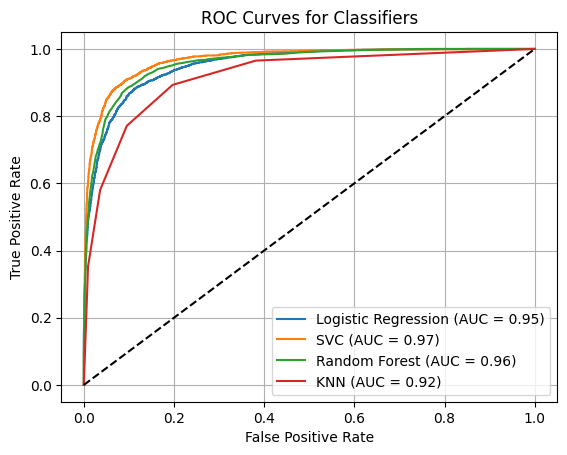

In [45]:
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output for the test set
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Get the predicted probabilities for each class
y_prob_log_reg = log_reg.predict_proba(X_test)
y_prob_svc = svc.predict_proba(X_test)
y_prob_rf = rf.predict_proba(X_test)
y_prob_knn = knn.predict_proba(X_test)

# Initialize plot
plt.figure()

# Compute ROC for each classifier by averaging the probabilities across classes
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test_bin.ravel(), y_prob_log_reg.ravel())
fpr_svc, tpr_svc, _ = roc_curve(y_test_bin.ravel(), y_prob_svc.ravel())
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin.ravel(), y_prob_rf.ravel())
fpr_knn, tpr_knn, _ = roc_curve(y_test_bin.ravel(), y_prob_knn.ravel())

# Calculate AUC for each classifier
auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
auc_svc = auc(fpr_svc, tpr_svc)
auc_rf = auc(fpr_rf, tpr_rf)
auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curves for each classifier
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (AUC = {:.2f})'.format(auc_log_reg))
plt.plot(fpr_svc, tpr_svc, label='SVC (AUC = {:.2f})'.format(auc_svc))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(auc_rf))
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(auc_knn))

# Configure the plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classifiers')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## Model Performance Summary

1. **Support Vector Classifier (SVC)**:
   - **Best performer** with the highest **AUC (0.97)**.
   - Strong classification across all categories.
   - **Conclusion**: Best overall choice due to superior precision, recall, and accuracy.

2. **Logistic Regression**:
   - **AUC (0.95)** with reliable performance, particularly strong for "Violence" and "Abusive Language."
   - **Conclusion**: A solid alternative, but slightly behind SVC.

3. **Random Forest**:
   - **AUC (0.95)**, similar to Logistic Regression.
   - Performs well but shows more misclassifications, especially between "Abusive Language" and "Violence."
   - **Conclusion**: A decent option but not as strong as SVC.

4. **K-Nearest Neighbors (KNN)**:
   - **Lowest AUC (0.85)** with high misclassification rates, especially between "Abusive Language" and "Violence."
   - **Conclusion**: Weakest model, not recommended.

### Overall Conclusion:
- **SVC** is the top-performing model with the highest accuracy and minimal misclassifications.
- **Logistic Regression**


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
